# Fichero de pruebas / Borrador

## Importar librerías

In [10]:
# ===== Librerías ==========================================
import warnings

import numpy as np
import pandas as pd   

# Gráficos
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Plotly
import plotly.express as px # Importing Plotly Express for high-level, easy-to-use interactive visualizations
import plotly.graph_objects as go # Importing Plotly Graph Objects for more fine-grained control over visualizations
from plotly.subplots import make_subplots # Multiple graphs in a figure

# Importando itertools para generar combinaciones de columnas
import itertools

# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose

# ===== Ajustes de visualización =============================
#Configuramos para que las gráficas se vean dentro del cuaderno
%matplotlib inline
# Establecemos el tamaño de la fuente en los gráficos
plt.rc('font', size=12)
# Ajustamos el tamaño de las figuras
plt.rc('figure', figsize=(12, 5))

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

## Cargar datos

In [3]:
# Load the dataset
df = pd.read_csv('./datasets/kaggle/spotify_cleaned_dataset.csv')
df.shape

(20594, 24)

## Explorar y probar

In [5]:
df['Album_type'].value_counts()

Album_type
album          14834
single          4973
compilation      787
Name: count, dtype: int64

In [6]:
columnas=df.columns.tolist()
columnas_numericas=df.describe().columns.tolist()

In [17]:
not_numericals = df.select_dtypes(np.object_).columns
not_numericals
lst_pies = []
for c in not_numericals:
    counts = df[c].value_counts()        
    if len(counts)<=10:
        drawpie = '-> pie'
        lst_pies.append(c)
    else:
        drawpie = ''
    print(f'{c} ({counts.index.__len__()} unique values)', drawpie)
print(f'\nDibujaremos {len(lst_pies)} pie charts')

Artist (2074 unique values) 
Track (17717 unique values) 
Album (11854 unique values) 
Album_type (3 unique values) -> pie
Title (18023 unique values) 
Channel (6673 unique values) 
Licensed (3 unique values) -> pie
official_video (3 unique values) -> pie
most_playedon (2 unique values) -> pie

Dibujaremos 4 pie charts


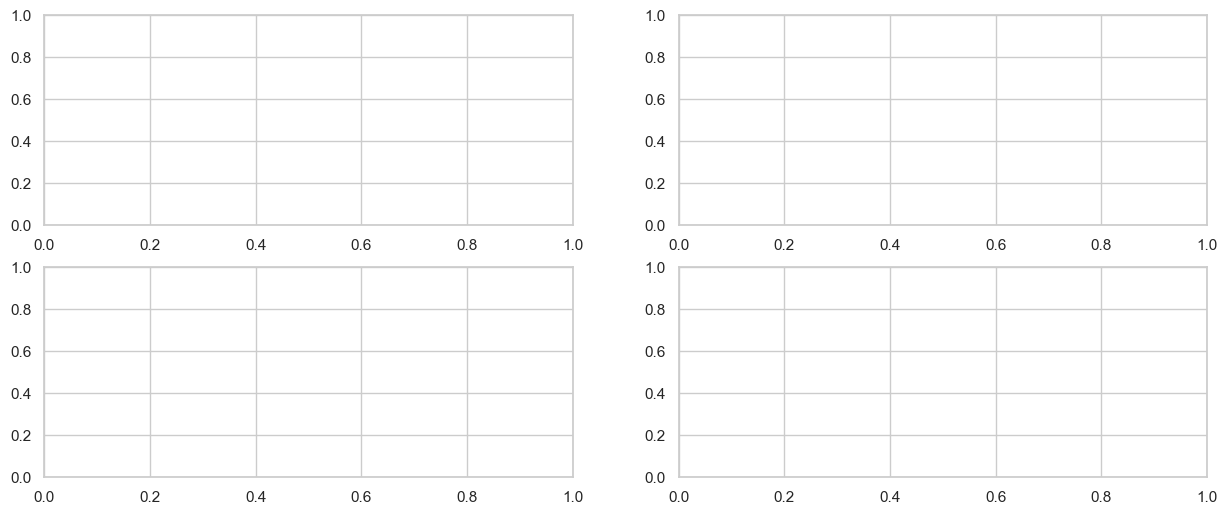

In [ ]:
# We want a subplot for every pie chart
lst = list(df.groupby('continent'))

# here we want our grid to be 2 x 3
rows = 2
cols = 3
# continents are the first element in l
subplot_titles = [l[0] for l in lst]

# a compact and general version of what you did
specs = [[{'type':'domain'}] * cols] * rows

# here the only difference from your code
# are the titles for subplots
fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=subplot_titles,
        specs=specs,
        print_grid=True)

for i, l in enumerate(lst):
    # basic math to get col and row
    row = i // cols + 1
    col = i % (rows + 1) + 1
    # this is the dataframe for every continent
    d = l[1]
    fig.add_trace(
        go.Pie(labels=d["country"],
               values=d["pop"],
               showlegend=False,
               textposition='inside',
               textinfo='label+percent'),
         row=row,
         col=col
    
    )
    
fig.update_layout(title="Population by Continent", title_x=0.5)
fig.show()


axs_idx = 0
for c in columnas:
    if c not in columnas_numericas:
        counts = df[c].value_counts()
        if len(counts)<=10:
            labels = {index_name: index_name for index_name in counts.index}    
            axs[axs_idx] = px.pie(names=counts.index, values=counts.values, title=f'Distribución de {c}', labels=labels)
            # axs[axs_idx].update_traces(textinfo='label+percent',  # Show both label and percentage
            #       textfont_size=14)                      # Font size of the labels
            # axs[axs_idx].update_layout(height=500)
            # axs[axs_idx].show()
            break

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 6))
ds.fees.type.value_counts().plot(kind='bar', ax=axs[0], width=0.6)
ds.fees.status.value_counts().plot(kind='bar', ax=axs[1], width=0.6)
ds.fees.category.value_counts().plot(kind='bar', ax=axs[2], width=0.6)
ds.fees.charge_moment.value_counts().plot(kind='bar', ax=axs[3], width=0.4)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #rect=[left, bottom, right, top]
fig.suptitle('Características categóricas del DataFrame fees')